In [2]:
from cf import CF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


items = [
    'a', 'ag', 'al', 'au', 'b', 'bb', 'bu', 'c', 'cf', 'cu', 'fb', 'fg', 'fu', 'i', 'j', 'jd', 
    'jm', 'jr', 'l', 'm', 'oi', 'p', 'pb', 'pm', 'rb', 'ri', 'rm', 'rs', 'ru', 'sr', 'ta', 'v', 
    'wh', 'wr', 'y', 'zn', 'fund'
]

item2name = {
    'a': '豆一', 'ag': '沪银', 'al': '沪铝', 'au': '沪金', 'b': '豆二', 'bb': '胶合板', 'bu': '沥青', 'c': '玉米', 'cf': '郑棉', 
    'cu': '沪铜', 'fb': '纤维板', 'fg': '玻璃', 'fu': '燃油', 'i': '铁矿石', 'j': '焦炭', 'jd': '鸡蛋', 'jm': '焦煤', 'jr': '粳稻', 
    'l': '塑料', 'm': '豆粕', 'oi': '菜油', 'p': '棕榈油', 'pb': '沪铅', 'pm': '普麦', 'rb': '螺纹钢', 'ri': '早籼稻', 'rm': '菜粕', 
    'rs': '菜籽', 'ru': '橡胶', 'sr': '白糖', 'ta': 'PTA', 'v': 'PVC', 'wh': '强麦', 'wr': '线材', 'y': '豆油', 'zn': '沪锌', 'fund': 'fund'
}


I,J,K = 7,7,5
M,N = 37,36

cf = CF('../merge/whole_month.data', ['log10'])
res = cf.tucker([I,J,K], [3.,3.,3.,3.])
print (res.RRMSE)
print (res.sparseness)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-1ce214c4-a450-42bb-93d6-78489847e7cb
Send 'exit' command to kill the server
...MATLAB started and connected!
MATLAB closed
0.28507961106
(0.53792370913013154, 0.53722259874889866, 0.32534172160075109, 0.57296363212455181)


# 时间模式

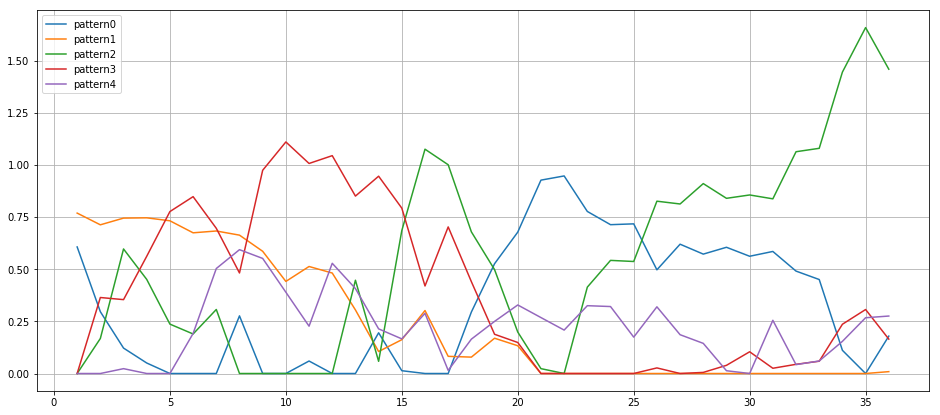

In [3]:
T = res.T
fig,ax = plt.subplots(figsize=(16,7))
for i in range(K):
    ax.plot(range(1,N+1), T[:,i], label='pattern%d'%i)
ax.grid()
ax.legend()
plt.show()

# 源模式

## 按“每种商品从属度最大”确定模式

In [4]:
O = res.O
origin = [[] for i in range(I)]

item2pattern = np.argmax(O, axis=1)
for i in range(M):
    origin[item2pattern[i]].append(item2name[items[i]])

for i in range(I):
    print (i, origin[i])

0 ['豆一', '沪银', '沪金', '郑棉', '沪铜', '玻璃', '铁矿石', '焦炭', '鸡蛋', '焦煤', '菜油', '棕榈油', '螺纹钢', '菜粕', '橡胶', '白糖', 'PTA', '线材', '豆油']
1 ['fund']
2 ['塑料', 'PVC']
3 ['沪铝', '燃油', '沪铅', '沪锌']
4 ['豆二', '胶合板', '纤维板', '粳稻', '早籼稻']
5 ['沥青']
6 ['玉米', '豆粕', '普麦', '菜籽', '强麦']


## 按列确定模式

In [5]:
origin = [[] for i in range(I)]
k = 8
for i in range(I):
    # 将模式i的各品种归属程度化为字典
    _dict = {'fund':O[-1,i]}
    for j in range(len(items)):
        _dict[items[j]] = O[j,i]
    for item,_ in sorted(_dict.items(), key=lambda kv:(-kv[1],kv[0]))[:k]:
        data[i].append(item)

for i in range(I):
    print (i, origin[i])

NameError: name 'data' is not defined

# 目的模式

## 按“每种商品从属度最大”确定模式

In [ ]:
data = [[] for i in range(J)]
for i in range(M):
    p = max(D[i])
    p = D[i].tolist().index(p)    # 判断第i项属于什么模式
    if i<len(items):
        data[p].append(items[i])
    else:
        data[p].append('fund')

for i in range(J):
    print (i, data[i])

## 按“每个模式从属度前K大”确定模式

In [ ]:
data = [[] for i in range(J)]
k = 8
for i in range(J):
    # 将模式i的各品种归属程度化为字典
    _dict = {'fund':D[-1,i]}
    for j in range(len(items)):
        _dict[items[j]] = D[j,i]
    for item,_ in sorted(_dict.items(), key=lambda kv:(-kv[1],kv[0]))[:k]:
        data[i].append(item)

for i in range(J):
    print (i, data[i])